In [26]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Credit.csv')

In [28]:
df.shape

(1000, 21)

In [29]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [30]:
#Separar os previsores da matriz
previsores = df.drop('class', axis=1)
classe = df['class']

In [31]:
#Transformar atributos categoricos em var numericas com onehotencoding
categorical_cols = ['checking_status','credit_history','purpose','savings_status',
                    'employment','personal_status','other_parties','property_magnitude',
                    'other_payment_plans','housing','job','own_telephone','foreign_worker']

previsores = pd.get_dummies(previsores, columns=categorical_cols)
previsores.shape

(1000, 61)

In [32]:
#transformar em array
previsores1 = previsores.copy()
previsores = previsores.values
classe = classe.values

In [33]:
#30% para teste e 70% para treinar
x_training, x_test, y_training, y_test = sk.model_selection.train_test_split(previsores,classe,test_size=0.3, random_state=0)
x_test

array([[36, 3959, 4, ..., True, False, True],
       [9, 3577, 1, ..., False, True, False],
       [18, 2515, 3, ..., True, False, True],
       ...,
       [24, 2028, 2, ..., False, False, True],
       [27, 8318, 2, ..., True, False, True],
       [12, 1295, 3, ..., False, False, True]],
      shape=(300, 61), dtype=object)

In [34]:
#criando o modelo e fazendo a geração da tabela de probabilidade
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x_training, y_training)

,priors,None
,var_smoothing,1e-09


In [35]:
#Testando
previsoes = naive_bayes.predict(x_test)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'g

In [36]:
#Geração da matriz de confusão com taxa de acerto e erro
confusao = sk.metrics.confusion_matrix(y_test,previsoes)
confusao

array([[ 58,  28],
       [ 57, 157]])

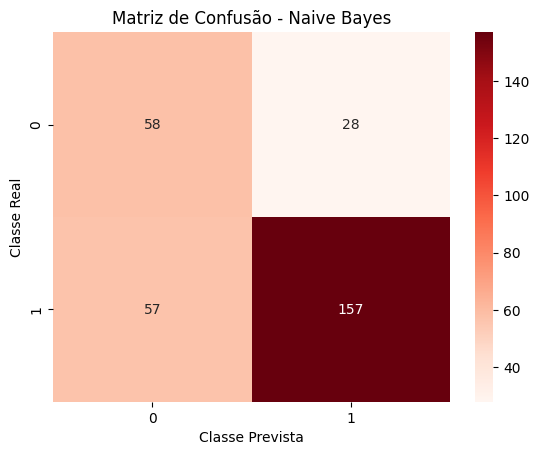

In [37]:
# Criar o heatmap
sns.heatmap(confusao, annot=True, fmt="d", cmap="Reds")
plt.title("Matriz de Confusão - Naive Bayes")
plt.ylabel("Classe Real") 
plt.xlabel("Classe Prevista")
plt.show()

In [38]:
taxa_acerto = sk.metrics.accuracy_score(y_test,previsoes)
taxa_erro = 1-taxa_acerto
taxa_acerto,taxa_erro

(0.7166666666666667, 0.2833333333333333)

Teste com novos dados

In [39]:
df1 = pd.read_csv('NovoCredit.csv')

In [40]:
df1.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,no checking,32,all paid,retraining,6027,no known savings,unemployed,1,male mar/wid,co applicant,1,car,41,stores,rent,1,unemp/unskilled non res,1,yes,no
1,<0,35,existing paid,repairs,9057,500<=X<1000,>=7,2,female div/dep/mar,co applicant,3,real estate,64,none,rent,2,skilled,1,yes,yes
2,0<=X<200,4,all paid,furniture/equipment,13570,>=1000,unemployed,3,female div/dep/mar,co applicant,4,life insurance,39,none,own,1,high qualif/self emp/mgmt,2,yes,yes
3,no checking,59,delayed previously,other,13799,500<=X<1000,unemployed,4,male mar/wid,co applicant,4,real estate,30,none,for free,4,high qualif/self emp/mgmt,2,none,no
4,no checking,60,delayed previously,radio/tv,2924,100<=X<500,4<=X<7,2,male mar/wid,co applicant,4,real estate,37,stores,rent,2,unskilled resident,2,yes,yes


In [41]:
df1 = pd.get_dummies(df1, columns=categorical_cols)

In [42]:
#Cria colunas com 0 se tiver colunas faltantes nos novos dados
for col in previsores1.columns:
    if col not in df1.columns:
        df1[col] = 0

In [43]:
new_credit = df1.values
new_credit.shape

(100, 61)

In [44]:
naive_bayes.predict(new_credit)

array(['good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'good'], dtype='<U4')